# From Simple Random Sampling to Stratified and Proportional Stratified Sampling

This document demonstrates the differences between Simple Random Sampling (SRS), Stratified Sampling, and Proportional Stratified Sampling (PSS). We compare results from each sampling method so the differences are clear.
We used data from the Open University Learning Analytics (OULAD) project to progress from SRS to PSS. According to The Open University web site, the data is about "courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules)".
This the [Open Learning Analytics dataset](https://analyse.kmi.open.ac.uk/open_dataset) used in this demonstration.
Tools used are python, pandas, and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
location = "C:\dataState\hub\Assessments.csv"
assessments = pd.read_csv(location, dtype={'id_assessment': str,'id_student': str})
print(assessments.shape)
assessments.sample(n=3)

(173912, 21)


,id_assessment,id_student,when_submitted_days,result_transferred,score_pct,code_module,code_presentation,assessment_type,final_submit_days,weight_assess_pct,...,gender,region,highest_edu,imd_band_pct,age_range,num_prev_attempts,studied_credits,disability,final_result,when_registered_days
97127,15012,630029,163,0,61,BBB,2014B,TMA,152.0,18.0,...,M,London Region,HE Qualification,20-30,0-35,0,120,N,Pass,-59.0
63712,34894,630830,212,0,75,FFF,2014B,CMA,227.0,0.0,...,M,North Region,Lower Than A Level,40-50,0-35,0,60,N,Pass,-29.0
153247,24282,133104,32,0,80,CCC,2014B,TMA,32.0,9.0,...,M,London Region,Lower Than A Level,10-20,0-35,0,120,Y,Distinction,-26.0


In [3]:
assessments.columns

Index(['id_assessment', 'id_student', 'when_submitted_days',
       'result_transferred', 'score_pct', 'code_module', 'code_presentation',
       'assessment_type', 'final_submit_days', 'weight_assess_pct',
       'mod_pres_days', 'gender', 'region', 'highest_edu', 'imd_band_pct',
       'age_range', 'num_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'when_registered_days'],
      dtype='object')

In [4]:
assessments.dtypes

id_assessment            object
id_student               object
when_submitted_days       int64
result_transferred        int64
score_pct                 int64
code_module              object
code_presentation        object
assessment_type          object
final_submit_days       float64
weight_assess_pct       float64
mod_pres_days             int64
gender                   object
region                   object
highest_edu              object
imd_band_pct             object
age_range                object
num_prev_attempts         int64
studied_credits           int64
disability               object
final_result             object
when_registered_days    float64
dtype: object

## Find a sampling error

- Find the mean score from the entire dataset (population of 173,912 instances)
- From the same dataset, sample 100 instances or observations (statistically, this should be at least 30 instances for future meaningful analysis)
- Find the mean score of the sample
- Calculate the samping error, that is, the difference between the population mean and the sample mean

In [5]:
population_mean = round(assessments['score_pct'].mean(), 1)
sample_from_population = assessments['score_pct'].sample(50)
sample_mean = round(sample_from_population.mean(), 1)
sampling_error = round(population_mean - sample_mean, 1)
print("The population mean score is:")
print(population_mean)
print("\nThe sample mean score is:")
print(sample_mean)
print("\nThe difference between the population mean and sample mean score is:")
print(sampling_error)

The population mean score is:
75.7

The sample mean score is:
77.7

The difference between the population mean and sample mean score is:
-2.0


Note that we do not use random_state, so your results will likely differ from the above. More than anything else, the point here is to illustrate process.
An important goal in statistics is to minimize the sampling error, for our samples to be representative of the populations from which they are drawn.

## Illustrate shortfalls of Simple Random Sampling (SRS)

Next, instead of one sample (see previous section), we shall sample the scores many more times and then visualize their means. The goal is to plot all the sample means and the solitary indicator of the population's mean scores.

In [6]:
# we already calculated our population mean, so we shall use that variable
# however, we do need structures to contain the samples of varying sizes
smallest_sample_size_means = []
medium_sample_size_means = []
large_sample_size_means = []
largest_sample_size_means = []

# we iterate a chosen number of times (e.g. 100) through our population and extract different size samples
for score in range(100):
    smallest_sample = assessments['score_pct'].sample(10)
    medium_sample = assessments['score_pct'].sample(50)
    large_sample = assessments['score_pct'].sample(100)
    largest_sample = assessments['score_pct'].sample(150)
    # populate each list with means from the different size samples
    smallest_sample_size_means.append(smallest_sample.mean())
    medium_sample_size_means.append(medium_sample.mean())
    large_sample_size_means.append(large_sample.mean())
    largest_sample_size_means.append(largest_sample.mean())

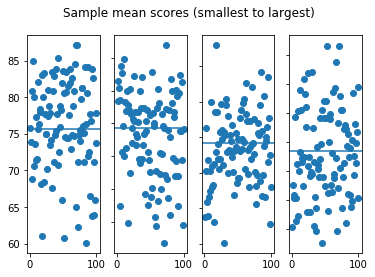

In [7]:
# visualize each set of sample means
# within each plot, display a horizontal line showing the population mean
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Sample mean scores (smallest to largest)')
ax1.scatter(range(1,101), smallest_sample_size_means)
ax1.axhline(population_mean)
ax2.scatter(range(1,101), medium_sample_size_means)
ax2.axhline(population_mean)
ax3.scatter(range(1,101), large_sample_size_means)
ax3.axhline(population_mean)
ax4.scatter(range(1,101), largest_sample_size_means)
ax4.axhline(population_mean)

for axes in fig.get_axes():
    axes.label_outer()

The scatter plots show differences between the entire population mean score (the horizontal line) and each of the sample mean scores represented by the dots. For instance, 10 scores were randomly sampled 100 times and each mean plotted in the left-most scatter plot. Note the changing relationship of the means with respect to the population mean - the horizontal line.
We can therefore conclude that, depending on sample sizes, the sample means vary widely when compared with the population score mean. The differences also imply some of our sample means do not fairly represent the population they are drawn from. 
This happens all the time with, for instance, opinion polls that are then pushed to an unsuspecting consumer as representative!
This is an age-old issue with Simple Random Sampling (SRS). In our case, there are several other features that could have influenced student scores, so if we ignore categories within some of those features, we risk missing large areas of a population that may more accurately contribute to our analysis.
Given these shortfalls, we shall then consider stratified sampling as an alternative to simple randing sampling.

## Combine random sampling with stratified sampling

To take sampling up a notch, we look at stratified sampling. As stated earlier, categories within some features present opportunities to be more strategic with our sampling.
First, we shall determine which features are categorical. Then, we shall pick one of the features for stratified sampling.

In [8]:
# These are all the features
assessments.columns

Index(['id_assessment', 'id_student', 'when_submitted_days',
       'result_transferred', 'score_pct', 'code_module', 'code_presentation',
       'assessment_type', 'final_submit_days', 'weight_assess_pct',
       'mod_pres_days', 'gender', 'region', 'highest_edu', 'imd_band_pct',
       'age_range', 'num_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'when_registered_days'],
      dtype='object')

In [9]:
# From all features, these have different levels or categories
cat_var = [key for key in dict(assessments.dtypes)
             if dict(assessments.dtypes)[key] in ['object'] ]
print(cat_var)

['id_assessment', 'id_student', 'code_module', 'code_presentation', 'assessment_type', 'gender', 'region', 'highest_edu', 'imd_band_pct', 'age_range', 'disability', 'final_result']


In [10]:
# Display levels in each candidate feature
print(assessments['code_module'].unique())
print(assessments['code_presentation'].unique())
print(assessments['assessment_type'].unique())
print(assessments['highest_edu'].unique())
print(assessments['imd_band_pct'].unique())

['DDD' 'FFF' 'GGG' 'BBB' 'CCC' 'EEE' 'AAA']
['2013B' '2014J' '2013J' '2014B']
['Exam' 'CMA' 'TMA']
['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'No Formal quals' 'Post Graduate Qualification']
['90-100' '70-80' '30-40' '40-50' '0-10' '20-30' '10-20' '50-60' '60-70'
 '80-90']


From available options, we are selecting highest education levels. This process should not be arbitrary. Research should involve why the different categories exist and why students' performance may be affected by membership in one category instead of another.

In [11]:
stratum_HE = assessments[assessments.highest_edu == 'HE Qualification']
stratum_Alevel = assessments[assessments.highest_edu == 'A Level or Equivalent']
stratum_LowerThanA = assessments[assessments.highest_edu == 'Lower Than A Level']
stratum_NoFormalQual = assessments[assessments.highest_edu == 'No Formal quals']
stratum_PostGradQual = assessments[assessments.highest_edu == 'Post Graduate Qualification']

Next, we loop through each of the highest education strata and perform simple random sampling.
Within each strata, calculate the mean score and store it in dictionary.

In [12]:
score_per_edu_level = {}
for stratum, level in [(stratum_HE, 'HE Qualification'), (stratum_Alevel, 'A Level or Equivalent')
                      ,(stratum_LowerThanA, 'Lower Than A Level'), (stratum_NoFormalQual, 'No Formal quals')
                      ,(stratum_PostGradQual, 'Post Graduate Qualification')]:
    sample = stratum['score_pct'].sample(100)
    score_per_edu_level[level] = round(sample.mean(), 1)
score_per_edu_level

{'HE Qualification': 76.4,
 'A Level or Equivalent': 74.9,
 'Lower Than A Level': 77.6,
 'No Formal quals': 71.1,
 'Post Graduate Qualification': 83.8}

As seen above, stratifying our dataset before sampling yields interesting results: we obtain a better idea of students' performances based on categories. This is more realistic when planning and policy-making depend on such insights. But it does not end here: while it is great that we now have mean scores per highest education level (or code module, code presentation, etc), we still need to determine average performances when appropriate categories are considered.
Specifically, within our strata above, how do we know how representative the means are within each strata? The answer lies in first determining how many students exists in each education level. Once we know this, we can then proportion out the sampling so that the SAME PROPORTION of students is randomly sampled from each education level. This guarantees that the mean scores we are relying on were generated from REPRESENTATIVE samples. In short, we must show that each student, regardless of education level, has the SAME OPPORTUNITY to be randomly sampled. To effect this, we need to conduct proportional stratified sampling.

## Sample proportionally

In [13]:
students_per_edu_level = assessments.groupby('highest_edu')['id_student'].nunique()
students_per_edu_level

highest_edu
A Level or Equivalent          10372
HE Qualification                3524
Lower Than A Level              9032
No Formal quals                  213
Post Graduate Qualification      228
Name: id_student, dtype: int64

Turns out the mean scores per education level are from massively unequal numbers numbers of students per level. There are more than 10,000 students with 'A Level or Equivalent', and only 228 with 'Post Graduate Qualification'. Ignoring this lopsidedness often leads to incorrect insights and mis-informed decision-making because our overall mean score is influenced the most by 'A Level or Equivalent' students. To address this problem, we need to ensure that a post-graduate or student without formal qualifications is equally likely to be sampled alongside an 'A Level or Equivalent' student.

In [14]:
# Determine the proportion of students in each education level
stud_prop_per_edu_group = assessments.groupby('highest_edu')['id_student'].nunique().reset_index()
stud_prop_per_edu_group['stud_prop'] = round(100 * stud_prop_per_edu_group['id_student']  / stud_prop_per_edu_group['id_student'].sum(), 0)
print(stud_prop_per_edu_group)

                   highest_edu  id_student  stud_prop
0        A Level or Equivalent       10372       44.0
1             HE Qualification        3524       15.0
2           Lower Than A Level        9032       39.0
3              No Formal quals         213        1.0
4  Post Graduate Qualification         228        1.0


To ensure fair representation, we need to sample per the proportions generated above. For example, 2 students (1% of 228 students) should be sampled from the 'Post Graduate Qualification' level each time we sample the scores.

In [15]:
proportional_sample_means = []

for i in range(100):
    sample_Alevel = stratum_Alevel['score_pct'].sample(44)
    sample_HE = stratum_HE['score_pct'].sample(15)
    sample_LowerThanA = stratum_LowerThanA['score_pct'].sample(39)
    sample_NoFormalQual = stratum_NoFormalQual['score_pct'].sample(1)
    sample_PostGradQual = stratum_PostGradQual['score_pct'].sample(1)
    
    final_sample = pd.concat([sample_Alevel, sample_HE, sample_LowerThanA, sample_NoFormalQual, sample_PostGradQual])
    proportional_sample_means.append(final_sample.mean())

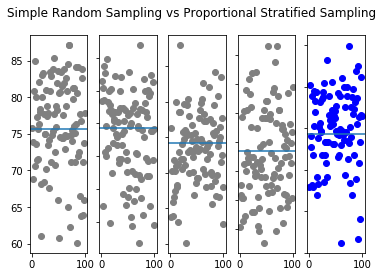

In [16]:
# visualize each set of sample means
# within each plot, display a horizontal line showing the population mean
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.suptitle('Simple Random Sampling vs Proportional Stratified Sampling')
ax1.scatter(range(1,101), smallest_sample_size_means, color='grey')
ax1.axhline(population_mean)
ax2.scatter(range(1,101), medium_sample_size_means, color='grey')
ax2.axhline(population_mean)
ax3.scatter(range(1,101), large_sample_size_means, color='grey')
ax3.axhline(population_mean)
ax4.scatter(range(1, 101), largest_sample_size_means, color='grey')
ax4.axhline(population_mean)
ax5.scatter(range(1, 101), proportional_sample_means, color='blue')
ax5.axhline(population_mean)

for axes in fig.get_axes():
    axes.label_outer()

The scatter plots above show Simple Random Sampling (first 4 plots) against Proportional Stratified Sampling (the right-most plot). The PSS plot is one that guarantees that whatever statistics we pursue from this point, we are guaranteed representative samples from the entire dataset (more than 23,000 students) that does not exclude entire sections of our population.

## Sample by cluster

Sometimes there simply aren't resources, time, etc., to go the proportional stratified sampling route illustrated above.
Enter cluster sampling. Imagine sampling the entire 'Post Graduate Qualification" group and leaving out, say, the "No Formal Quals' group. How will analysis based on such a sample influence policy? Cluster sampling has its pitfalls, but if it is the only option, well...

In [17]:
# Staying with the highest education levels, we start by randomly selecting three of the five
clusters = pd.Series(assessments['highest_edu'].unique()).sample(3)

sample = pd.DataFrame()

for a_cluster in clusters:
    sampled_data = assessments[assessments['highest_edu'] == a_cluster]
    sample = sample.append(sampled_data)

score_SE = round(assessments['score_pct'].mean() - sample['score_pct'].mean(), 2)
submitted_SE = round(assessments['when_submitted_days'].mean() - sample['when_submitted_days'].mean(), 2)
previous_credit_SE = round(assessments['studied_credits'].mean() - sample['studied_credits'].mean(), 2)
print(score_SE)
print(submitted_SE)
print(previous_credit_SE)

1.46
0.72
2.95


In the above results, we see differences between the population mean and cluster means. These are sampling errors that may influence future analysis one way or another.

# Conclusion

Long before we analyze and model data, there is sampling. A thoughtful approach to sampling ultimately affects the quality of analysis, insights, and decisions that may have far-reaching consequences. It is therefore worth the time and effort to sample our datasets in ways that maximize representation.

- By General Ntshalintshali
- portfolio: [datastate.org](https://datastate.org/)